# Getting Started with TensorFlow

## TensorFlow on MNIST dataset


### What is TensorFlow?
One of the articles (http://www.businessinsider.com/what-is-google-tensorflow-2015-11) from Business Insider mentioned about Google's TensorFlow as Artificial Intelligence System of Google. As this article describes, Google built a machine learning system that was fed with an image and it returned if it was a cat or a dog. Steps taken to implement this on a high level were that first the TensorFlow sorts through data layers where every step is performing certain tasks like identifying shape in the picture and then next layer gets into more detailed identification and so on. These layers can be refered to as nodes. This process of compiling information layer by layer to make final identification is called as Tensor & process is called TensorFlow.

### About MNIST dataset
The dataset is hosted on http://yann.lecun.com/exdb/mnist/ .
It is a database of handwritten digits with training samples of 60000 examples and 10000 test examples. This is a subset data of NIST database. The digits are normalized and centered in a fixed-size image.

### References
1. https://www.youtube.com/watch?v=wuo4JdG3SvU
2. https://www.tensorflow.org/get_started/mnist/mechanics


In [7]:
# Import the libraries essential for this analysis.

import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix

In [8]:
# We now download MNIST dataset which is about 12MB

from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot = True)

# We used one_hot= True which means we enable one hot encoding for the dataset. 
# This means that the label for each sample in the dataset is a vector of number of classes 
# (here number of classes are 10) and only 1 element of that vector would be 1 rest all would be 0.
# If the 8th element of that vector is 1, then label is 8


Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [12]:
# We check the size of the datasets Train, Test and Validation

print("Training-set:\t\t{}".format(len(data.train.labels)))
print("Test-set:\t\t{}".format(len(data.test.labels)))
print("Validation-set:\t\t{}".format(len(data.validation.labels)))

Training-set:		55000
Test-set:		10000
Validation-set:		5000


In [75]:
# We noticed that the labels are hot encoded. 
# We figure out the exact class label number using following code-
data.train.cls = np.array([label.argmax() for label in data.train.labels])
data.train.cls[0:10] # labels for first 10 images in training dataset
# We figure out the exact class label number using following code-
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:10] # labels for first 10 images in training dataset

array([6, 9, 2, 6, 9, 7, 2, 9, 1, 5])

In [15]:
# Data Dimensions or setting variables for some essential known factors
image_size = 28 # MNIST images are 28x28 pixeled
image_size_flat = image_size*image_size # one dimensional array for image
image_shape = (image_size, image_size) # size in this case is (28,28) indicating height and width in pixels
number_classes = 10 # total number of labels


[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
3


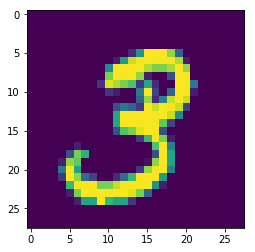

In [41]:
# We check what is the first image and reshape is used because data.train.images[1] is 1 dimensional vector 
# and we need to reshape it to be of 28x28 shaped pixel image
plt.imshow(data.train.images[1].reshape(image_shape)) 
print(data.train.labels[1])
print(data.train.cls[1])


### Purpose of TensorFlow is to have a computational graph. 
#### TensorFlow graph consists of -
1. Placeholder variables - used for changing graph inputs
2. Model variables - used for finding optimized model parameters
3. Model
4. Cost Metric- used for optimizing the model variables
5. Optimization Method

### Define Placeholder Variables

In [42]:
# We define the placeholder variable
X = tf.placeholder(tf.float32,[None, image_size_flat])
# tf.float32 is data type float for the placeholder variable
# then this variable is a 2 D variable/array/matrix where we set number of rows for this matrix to be none,
# which means it can have any number of rows and number of columns is fixed to image_size_flat (28*28)
# This means X has many rows, one row per image & all the images are flattened thus having total 28*28 columns

In [44]:
# For every image there is corresponding label
# we create a place holder for label
# its datatype is float and number of rows is not fixed but number of columns is equal to total unique classes (i.e. 10)
y_true = tf.placeholder(tf.float32, [None,number_classes])

In [45]:
# Actual Class
# Number of rows could be arbitrary
# data type is integer
# This is a 1 dimensional vector storing only class labels in integer format
y_true_class = tf.placeholder(tf.int64, [None])

### Define Model Variables or Parameters to be optimized

In [46]:
# We define weights variable for optimization
# initialize it to 0
weights = tf.Variable(tf.zeros([image_size_flat, number_classes]))

In [47]:
# We also define bias
# Initialize it to 0
bias = tf.Variable(tf.zeros([number_classes]))

### Define Model

In [48]:
# Model is supposed to multiply weights to the columns of flattened image and then add bias
# Result is a matrix of [number_of_images, number_classes]
# Weight is matrix of size [image_size_flat, number_classes]
# image is a matrix of size [number_of_images, image_size_flat]
# bias is a matrix of size [number_of_images]

# we name the model as logits as it is a typical TensorFlow terminology
logits = tf.matmul(X,weights)+bias

# The output of this model is a matrix with rows containing image and columns containing class(0 to 9)
# Element value of ith row and jth column indicates how likely the ith image corresponds to jth class.

# The output of these models however are rough estimates and interpretation is difficult so normalization is advised
# To interpret these values as probabilities, we normalize the values such that over all classes the sum is 1
# This can be accomplished using softmax
y_pred = tf.nn.softmax(logits)

In [50]:
y_pred_cls = tf.argmax(y_pred, dimension=1)
# this gives the predicted class by choosing the class that has highest probability listed

### Define Cost Function

In [51]:
# Purpose is to optimize weights and biases
# Cross entropy is used as it gives a continuous function such that if the match is perfect output is 0 else 
# it returns some positive value
# For every image we calculate cross entropy between true and predicted classes
# we will use logits model and y_true for buiding this cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_true)

# this gives cross entropy for every input image
# for single scaler value to be returned by the cross_entropy, average of all cross_entropy is calculated
cost = tf.reduce_mean(cross_entropy)

### Define Optimization Method

In [52]:
# we shall use gradient descent method
# minimize the cross_entropy cost
# set step size as 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

### Define Performance Measures

In [55]:
# we find out correct number of predictions
correct_pred = tf.equal(y_pred_cls, y_true_class)

# we find now the classification accuracy
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## TensorFlow Graph

### Initiate TensorFlow Session

In [58]:
# First create TensorFlow session
session = tf.Session()

In [60]:
# Initialize variables weights and bias before optimizing them
session.run(tf.global_variables_initializer())

### Define Optimization Iterations Function

In [62]:
# initialize a batch_size for passing only a set of images from the training data as dataset contains over 50000 images
batch_size = 200

# define the function for optimizing which takes in iterations required
# for every iteration it should take a random batch of 100 images 
# for every iteration it should have a dictionary storing the image and its true labels
# for every iteration then we run the optimizer function with the feed dictionary

def optimize(iterations):
    for i in range(iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_training = {x: x_batch, y_true: y_true_batch}
        session.run(optimizer, feed_dict = feed_dict_training)

### Define function to find performance (Performance measures and functions.....) Work in progress..